In [1]:
# import statistical tools
import numpy as np
import pandas as pd
import sklearn
from statsmodels.formula.api import ols
import statsmodels as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from statsmodels.stats.outliers_influence import summary_table

In [2]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# import dataset
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Boston.csv"
Boston = pd.read_csv(url, index_col = "SlNo") # please use the absolute path in your own computer like I have used in mine 

In [9]:
# basic exploration of data
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
SlNo,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
Boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
# fit model through linear regression
Y = Boston['medv']
X = Boston['lstat']
model = ols("Y~X", data = Boston).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           5.08e-88
Time:                        20:25:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [16]:
# predict the model
dt = summary_table(model, alpha = 0.5)[1]
Y_prd = dt[:, 2]
Yprd_ci_lower, Yprd_ci_upper = dt[:, 6:8].T
pd.DataFrame(np.column_stack([Y_prd, Yprd_ci_lower, Yprd_ci_upper])).head()

,0,1,2
0,29.822595,25.618169,34.027022
1,25.870390,21.669748,30.071032
2,30.725142,26.519457,34.930827
3,31.760696,27.553387,35.968004
4,29.490078,25.286078,33.694078


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


Text(0.5,1,'Non-Linear Model')

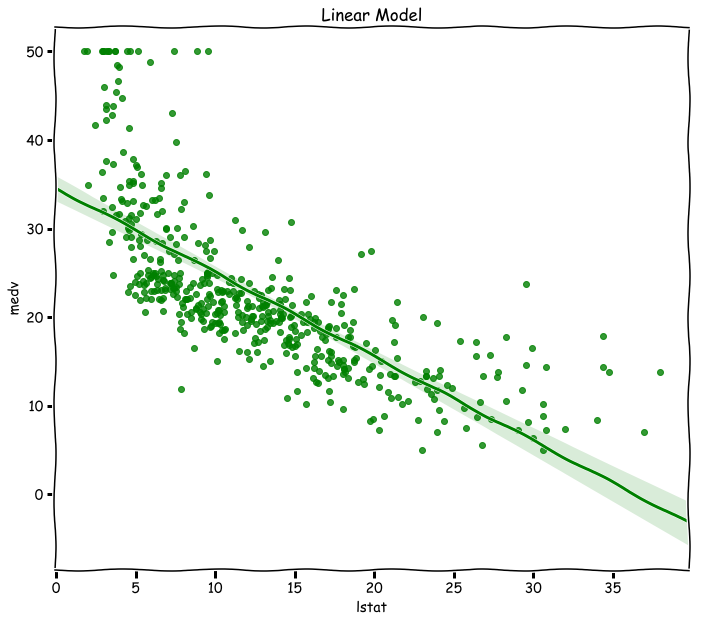

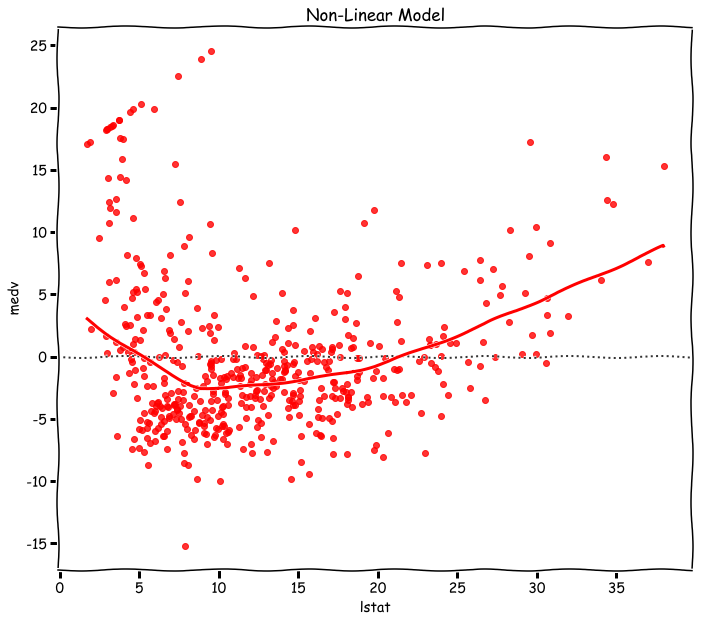

In [22]:
# plot graph with regression line
plt.xkcd()
plt.figure(figsize = (25, 10))
plt.figure(1).add_subplot(121)
print(sns.regplot(X, Y, data = model, color = 'g'))
plt.title("Linear Model")

plt.figure(figsize = (25, 10))
plt.figure(2).add_subplot(122)
print(sns.residplot(X, Y, lowess = True, color = 'r'))
plt.title("Non-Linear Model")